# PCA 
-  PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.
-  https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import random
sns.set()

In [8]:
# 2 Dim data
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2, 200)).T
X[0:5,]

array([[-0.62530162, -0.17006366],
       [ 0.96069503,  0.5909006 ],
       [-0.59854339, -0.40259339],
       [-2.22805938, -0.53257674],
       [-0.46143006, -0.49886724]])

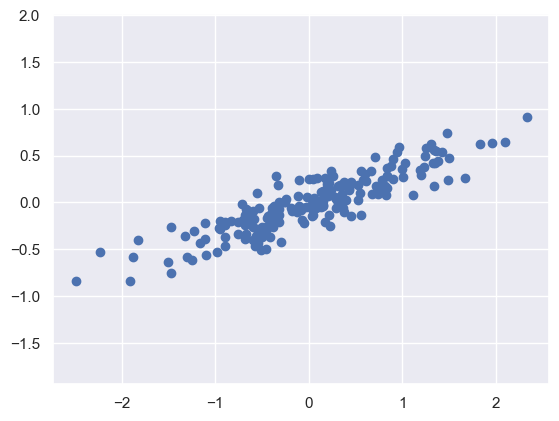

In [10]:
plt.scatter(X[:, 0], X[:,1])
plt.axis('equal')
plt.show()

In [12]:
# PCA estimator
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(n_components=2)

In [13]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [14]:
pca.explained_variance_

array([0.7625315, 0.0184779])

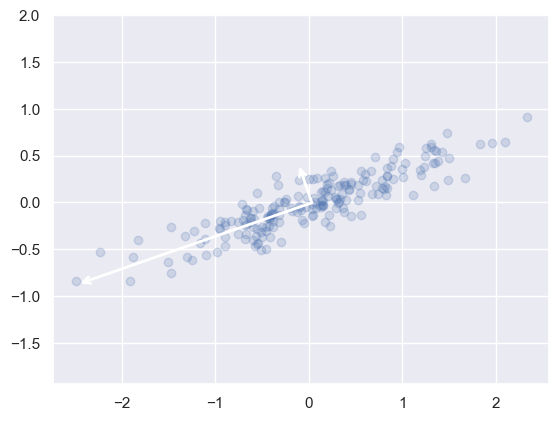

In [15]:
#mean of above values
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show();

In [16]:
# PCA for dim Reduction
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


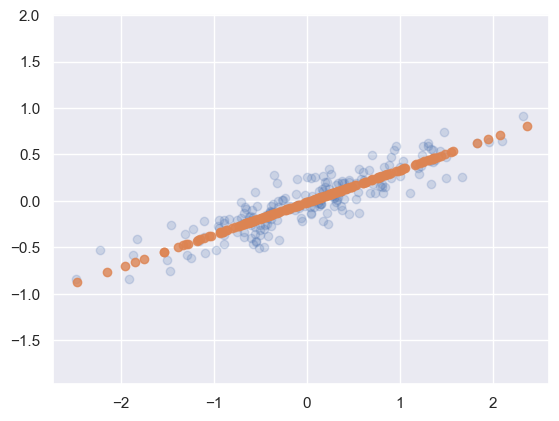

In [17]:
# inverse
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')
plt.show();